In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from xgboost import XGBClassifier

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [4]:
train.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [5]:
train.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [6]:
id_ = test['id']

In [7]:
train = train.drop('id', axis=1)
test = test.drop(['id'], axis=1)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  58645 non-null  int64  
 1   person_income               58645 non-null  int64  
 2   person_home_ownership       58645 non-null  object 
 3   person_emp_length           58645 non-null  float64
 4   loan_intent                 58645 non-null  object 
 5   loan_grade                  58645 non-null  object 
 6   loan_amnt                   58645 non-null  int64  
 7   loan_int_rate               58645 non-null  float64
 8   loan_percent_income         58645 non-null  float64
 9   cb_person_default_on_file   58645 non-null  object 
 10  cb_person_cred_hist_length  58645 non-null  int64  
 11  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 5.4+ MB


In [9]:
train['cb_person_default_on_file']

0        N
1        N
2        N
3        N
4        N
        ..
58640    Y
58641    N
58642    N
58643    N
58644    N
Name: cb_person_default_on_file, Length: 58645, dtype: object

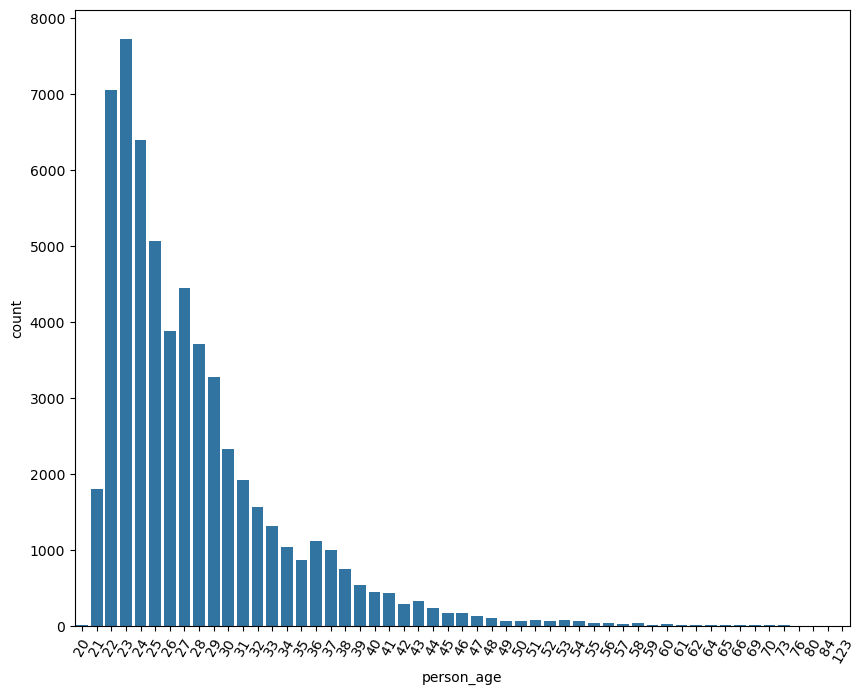

In [10]:
plt.figure(figsize=(10,8))
sns.countplot(x=train['person_age'])
plt.xticks(rotation=60)
plt.show()

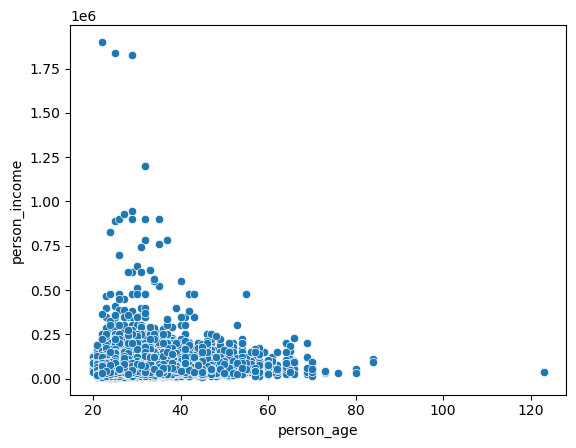

In [11]:
sns.scatterplot(x=train['person_age'], y=train['person_income'])
plt.show()

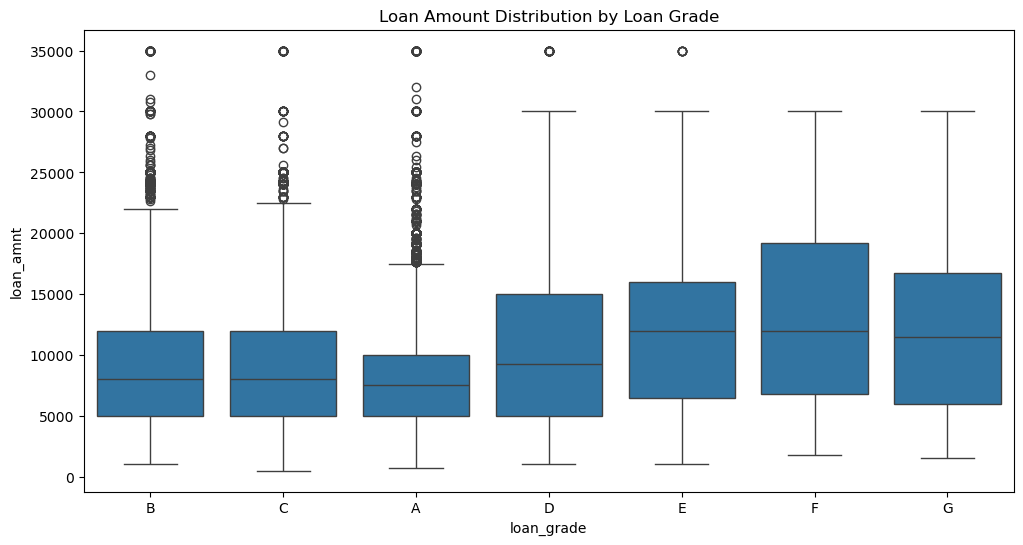

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_grade', y='loan_amnt', data=train)
plt.title('Loan Amount Distribution by Loan Grade')
plt.show()

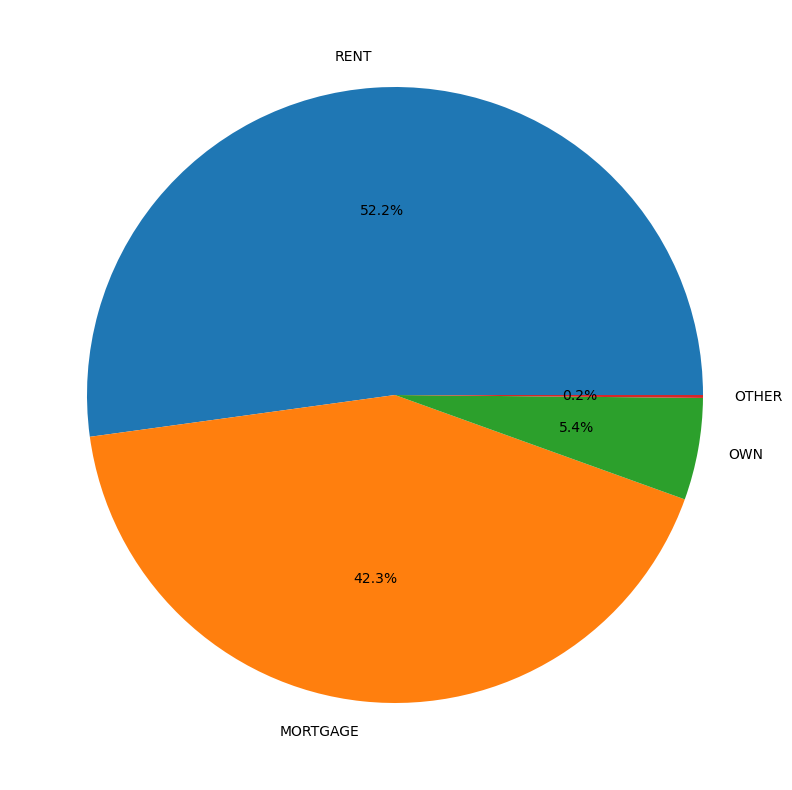

In [13]:
plt.figure(figsize=(10, 10))
train['person_home_ownership'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.show()

In [14]:
t_corr = train.select_dtypes(include=[float,int])
t_corr.corr()['loan_status'].sort_values()

person_income                -0.169956
person_emp_length            -0.100428
cb_person_cred_hist_length   -0.003030
person_age                   -0.001130
loan_amnt                     0.144982
loan_int_rate                 0.338948
loan_percent_income           0.378280
loan_status                   1.000000
Name: loan_status, dtype: float64

In [15]:
def percent_missing(df):
    total = 100 * df.isnull().sum() / len(df)
    total = total[total > 0].sort_values(ascending=False)
    return total

In [16]:
missing = percent_missing(test)
missing

Series([], dtype: float64)

In [17]:
def encode(df):
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    categorical_columns = df.select_dtypes(include='object').columns
    transformed_values = encoder.fit_transform(df[categorical_columns])
    transformed_columns = encoder.get_feature_names_out(categorical_columns)
    encoded_df = df.drop(columns=categorical_columns).copy()
    encoded_df[transformed_columns] = transformed_values 
    
    return encoded_df

In [18]:
train = encode(train)
train

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,37,35000,0.0,6000,11.49,0.17,14,0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,22,56000,6.0,4000,13.35,0.07,2,0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,29,28800,8.0,6000,8.90,0.21,10,0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30,70000,14.0,12000,11.11,0.17,5,0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,22,60000,2.0,6000,6.92,0.10,3,0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,34,120000,5.0,25000,15.95,0.21,10,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
58641,28,28800,0.0,10000,12.73,0.35,8,1,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
58642,23,44000,7.0,6800,16.00,0.15,2,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
58643,22,30000,2.0,5000,8.90,0.17,3,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
X = train.drop('loan_status', axis=1)
y = train['loan_status']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [21]:
X_train.shape, y_train.shape

((41051, 22), (41051,))

In [23]:
model = XGBClassifier(
    objective='binary:logistic',
    gamma=1.0,
    learning_rate=0.1,
    max_depth=5,
    reg_lambda=10.0,
    scale_pos_weight=5,
    subsample=0.9,
    colsample_bytree=0.5
)

In [24]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [25]:
pred = model.predict(X_test)

In [26]:
accuracy = accuracy_score(y_test, pred)
print(accuracy)

0.9275321132204161


In [28]:
roc_auc = roc_auc_score(y_test, pred)
print(roc_auc)

0.8803753762827686


In [27]:
report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     15126
           1       0.71      0.81      0.76      2468

    accuracy                           0.93     17594
   macro avg       0.84      0.88      0.86     17594
weighted avg       0.93      0.93      0.93     17594



In [ ]:
 predictions = model.predict(X_test)
    
    # Create submission DataFrame
    submission = pd.DataFrame({
        'id': test_ids,
        'loan_status': predictions
    })
    
    # Save submission file
    submission.to_csv(submission_path, index=False)
    print(f"Submission file created: {submission_path}")